In [ ]:
! unzip resume_corpus/resume_samples.zip -d resume_corpus
! unzip resume_corpus/resumes_corpus.zip -d resume

Streaming output truncated to the last 5000 lines.
  inflating: resume/03012.lab        
  inflating: resume/03013.lab        
  inflating: resume/03014.lab        
  inflating: resume/03015.lab        
  inflating: resume/03016.lab        
  inflating: resume/03017.lab        
  inflating: resume/03018.lab        
  inflating: resume/03019.lab        
  inflating: resume/03020.lab        
  inflating: resume/03021.lab        
  inflating: resume/03022.lab        
  inflating: resume/03023.lab        
  inflating: resume/03024.lab        
  inflating: resume/03025.lab        
  inflating: resume/03026.lab        
  inflating: resume/03027.lab        
  inflating: resume/03028.lab        
  inflating: resume/03029.lab        
  inflating: resume/03030.lab        
  inflating: resume/03031.lab        
  inflating: resume/03032.lab        
  inflating: resume/03033.lab        
  inflating: resume/03034.lab        
  inflating: resume/03035.lab        
  inflating: resume/03036.lab        

In [ ]:
# make word2vec model which will be used for converting resume to numerical data

In [ ]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import string
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from tqdm import tqdm
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import hashlib
import spacy
from collections import Counter
 
MY_DIR = '/content/drive/My Drive/Resume Classification'
MY_DIR2 = '/content/drive/My Drive/Resume Classification2'
# nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
skills_path = MY_DIR + '/data/skills.txt'




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


created to covnert resume text to tokens after removing stopwords and punctuations from text.

In [ ]:
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential
import keras
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import layers

In [ ]:
#word tokenize and remove stopwords
 
def removestop_words(resumetext):
  tokenizer = RegexpTokenizer(r'\w\w+')
  texttokens =tokenizer.tokenize(resumetext)
  stop_words = stopwords.words("english")
  tokens_without_sw = [word for word in texttokens if not word in stop_words]
  
  return tokens_without_sw
 
def jointoken(word_tokens):
  filtered_sentence = (" ").join(word_tokens)
  return filtered_sentence
 
 
resumetext = "Harsh is a great boy , and he loves ; to play basketball with Manish. #include<iostream> An"
 
print(removestop_words(resumetext))
 
# print(jointoken(removestop_words(resumetext)))
# print(get_tokens(resumetext));

['Harsh', 'great', 'boy', 'loves', 'play', 'basketball', 'Manish', 'include', 'iostream', 'An']


In [ ]:
def domain_word_selection(resumetext):
  tokenizer = RegexpTokenizer(r'\w\w+')
  texttokens =tokenizer.tokenize(resumetext)
  
  stop_words = stopwords.words("english")
  tokens_without_sw = [word for word in texttokens if not word in stop_words]

  for token in tokens_without_sw:
    try:
      if itemData[token]:
        pass
    except:
        tokens_without_sw.remove(token)  
  return tokens_without_sw

In [ ]:
# import codecs
# tokenizer = RegexpTokenizer('\/|^\.|\.$|,|;|\(|\)|^\-|\-$|:|;', gaps=True)

# skills_file = codecs.open(skills_path, "rU", encoding='utf-8', errors='ignore')
# tokens_in = set(tokenizer.tokenize(skills_file.read()))
# tokens_in = [token.lower() for token in tokens_in]
# # tokens_in = dict(zip(tokens_in, len(tokens_in)))
# dict = {}

# for token in tokens_in:
#   if token.lower() == 'dell\t':
#     print('yes')
#   dict[token] = len(token)
#   # print(token)
# print(tokens_in[0])

In [ ]:
for key, value in tokens_in.items():
  print(key, value)

In [ ]:
def domain_specific():
  skills_file = codecs.open(skills_path, "rU", encoding='utf-8', errors='ignore')
  tokens_in = set(tokenizer.tokenize(skills_file.read()))
  tokens_in = [token.lower() for token in tokens_in]
  tokens_in = dict(zip(tokens_in, range(len(tokens_in))))

In [ ]:
 def init_outputs():
      y_dict = dict()
      data_y_file.seek(0)
      lines = data_y_file.read().splitlines()
      tokens_out = []
      for line in lines :
          line_items = line.split(":")
          y_dict.update({line_items[0].lower():line_items[1].split(",")})
          tokens_out+=line_items[1].split(",")
      return y_dict, Counter(tokens_out)

In [ ]:
def filter_tokens_out(freq):
        filtered_tokens = [t for t,v in tokens_out.items() if v >= freq]
        return filtered_tokens

In [ ]:
   def get_tokens(text):
        sents = nltk.sent_tokenize(text)
        tokens = [token.lemma_ for sent in sents for token in nlp(sent.lower())
                  if token.lemma_ not in stopset and len(token.lemma_) > 2
                  and (token.lemma_ is not ":::" or token.lemma_ is not "::::::")]
        tokens = Counter(tokens)
        return tokens

In [ ]:
import json
with open('/content/drive/My Drive/Resume Classification/data/tokens_in.json') as json_file:
    itemData = json.load(json_file)

## Storing resume text to corpus before applying Word 2 Vec i.e Skip gram Algo

In [ ]:
# read all resumes to make learn word2vec
corpus = []
with open('resume_corpus/resume_samples.txt', encoding="ISO-8859-1") as file:
  for line in tqdm(file):
    text = line.split(':::')[-1].rstrip()
    text = domain_word_selection(text)
    corpus.append(text)
 
corpus[0]


0it [00:00, ?it/s]
22it [00:00, 220.00it/s]
43it [00:00, 208.79it/s]
63it [00:00, 205.91it/s]
88it [00:00, 209.02it/s]
117it [00:00, 226.38it/s]
155it [00:00, 255.24it/s]
194it [00:00, 280.44it/s]
223it [00:00, 238.75it/s]
248it [00:01, 227.41it/s]
272it [00:01, 221.20it/s]
295it [00:01, 222.12it/s]
318it [00:01, 223.30it/s]
352it [00:01, 244.73it/s]
383it [00:01, 249.53it/s]
411it [00:01, 254.77it/s]
437it [00:01, 248.86it/s]
463it [00:01, 240.71it/s]
489it [00:02, 244.70it/s]
514it [00:02, 231.36it/s]
546it [00:02, 248.61it/s]
581it [00:02, 270.99it/s]
610it [00:02, 264.17it/s]
638it [00:02, 252.81it/s]
664it [00:02, 246.32it/s]
692it [00:02, 255.14it/s]
719it [00:02, 255.70it/s]
769it [00:02, 298.78it/s]
802it [00:03, 301.62it/s]
835it [00:03, 294.85it/s]
866it [00:03, 279.97it/s]
897it [00:03, 287.54it/s]
927it [00:03, 271.86it/s]
955it [00:03, 257.93it/s]
982it [00:03, 256.26it/s]
1009it [00:03, 224.32it/s]
1033it [00:04, 223.48it/s]
1057it [00:04, 223.25it/s]
1081it [00:04, 227.

['span',
 'class',
 'hl',
 'span',
 'self',
 'motivated',
 'Administrator',
 'possesses',
 'strong',
 'analytical',
 'problem',
 'solving',
 'My',
 'experience',
 '2008',
 '2012',
 'SSIS',
 'clustering',
 'mirroring',
 'high',
 'availability',
 'OLTP',
 'proficient',
 'database',
 'backup',
 'recovery',
 'performance',
 'tuning',
 'maintenance',
 'security',
 'consolidation',
 'would',
 'make',
 'addition',
 'Over',
 'career',
 'far',
 'fit',
 'needs',
 'ensured',
 'security',
 'problem',
 'order',
 'back',
 'front',
 'needs',
 'tested',
 'new',
 'database',
 'management',
 'customized',
 'applications',
 'monitored',
 'performance',
 'front',
 'experience',
 'During',
 'working',
 'Administrator',
 'Family',
 'Private',
 'Care',
 'LLC',
 'Roswell',
 'GA',
 'April',
 'Present',
 'successfully',
 'secure',
 'Planning',
 'backup',
 'recovery',
 'database',
 'information',
 'archived',
 'data',
 'restoring',
 'Contacting',
 'database',
 'vendor',
 'technical',
 'support',
 'querying',
 'd

In [ ]:
corpus = np.load('{}/corpus.npy'.format(MY_DIR), allow_pickle=True)

In [ ]:
np.save('{}/corpus.npy'.format(MY_DIR), corpus)

In [ ]:
with open('input.json') as json_file:
    itemData = json.load(json_file)

**We have taken mean of the dimensions of the vector and that mean will be fixed dimension of our vec**

In [ ]:
print(len(corpus))
length = np.array([len(i) for i in corpus])
mean = length.mean()

print('Average count :',mean)
print('Max word count :', length.max(),'\nMin word count :', length.min())
cnt = 0
for i in length:
  if i > 1000:
    cnt+=1

print(cnt)

29783
Average count : 422.1086525870463
Max word count : 5549 
Min word count : 1
2520


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Creating Word to vec Skip Gram Algo model of size 100 and window 5 as given  in paper**

In [ ]:
# model with embedding size 100
model_sg = Word2Vec(corpus, min_count=1, size=100, sg=1, window=5)

In [ ]:
# model with embedding size 32
model_sg = Word2Vec(corpus, size=32, min_count=1, sg=1, window=5)

In [ ]:
word = 'vue'
# print(model.wv.most_similar(word))
print(model_sg.wv.most_similar(word))

[('vuejs', 0.8455314040184021), ('vuex', 0.812808632850647), ('sequelize', 0.8099300861358643), ('reactjs', 0.7987944483757019), ('pug', 0.7951518297195435), ('Aurelia', 0.7923516631126404), ('codeigniter', 0.7922143936157227), ('Svelte', 0.7909705638885498), ('VueJs', 0.7875620722770691), ('NestJS', 0.786848247051239)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**We have saved the model to below location so no  need to run the model again simply run below to use our Word to vec embeddings**

In [ ]:
# save model
# model.save('/content/drive/My Drive/Resume Classification/model_wv.32.model')
model_sg.save('/content/drive/My Drive/Resume Classification/model_sg_wv.100d.model')
# model_sg.save('/content/drive/My Drive/Resume Classification2/model_sg_wv.100d.model')

**We have taken 32  and not 100 as it was not running for such large dataset of size 29784 so at the end we will use online gpu to create 100....**

In [ ]:
model_sg = Word2Vec().wv.load('/content/drive/My Drive/Resume Classification/model_sg_wv.100d.model')
wv = model_sg.wv

In [ ]:
#len(corpus)
wv['javascript']

array([ 0.66919196,  0.41995826, -0.23967113, -0.02568654, -0.30981097,
        0.28099573, -0.1306297 , -0.03379919,  0.12993032,  0.9338645 ,
       -0.6988766 , -0.03188945,  0.13836654, -0.5065997 ,  0.15139075,
        0.19198453,  0.07833037, -0.46477124, -0.3002065 ,  0.02517138,
       -0.1564386 , -0.06888488, -0.08363433,  0.01325233, -0.06530058,
        0.56579494, -0.1997449 , -0.20778552, -0.01534452, -0.0204853 ,
       -0.08356263, -0.17737857,  0.03043083, -0.05116267, -0.02596845,
       -0.67619103, -0.24654047,  0.6193722 ,  0.65832716, -0.35787734,
       -0.3383283 ,  0.0811897 ,  1.1668003 ,  0.12855217,  0.2603148 ,
        0.00206211, -0.18018924,  0.5426862 ,  0.44457117, -0.07086255,
       -0.27296707, -0.6057506 ,  0.06143422,  0.71941704,  0.1034524 ,
        0.22984405, -0.33912757,  0.30669683,  0.37042838, -0.19003129,
        0.1398819 , -0.38391158, -0.48510695, -0.2938842 ,  0.02863318,
       -0.5588423 ,  0.2100019 , -0.02482275,  0.52498925, -0.04

**As Given in Pdf we have created an empty matrix and vector whose dimension is not L we simply add padding and those whose dimension is greater we ignore**

**Here we have processed label for database administrator and stored our npy file for future use**


1.  We have to create for 9 more y labels i.e for 9 more classes
We wil run this for 9 more class everytime channging label of the class


In [ ]:
low__,high__ = 1,29784
pre=0.84
 
import random
from sklearn.utils import shuffle
 
def process_resume_data(dirpath, L, size=32):
 
  X = []
 
  for i in tqdm(range(low__,high__)):
    with open('{}/{:05d}.txt'.format(dirpath, i), encoding='ISO-8859-1') as f:
      line = f.readline()
      line = removestop_words(line)
      x = []
      length = L
      for word in line:
        if length > 0:
          # if word in model.wv:
          try:
            x.append(np.array(wv[word], dtype=np.float32))
            length -= 1
          except:
            pass
        else:
          break
 
      while length > 0:
        x.append(np.zeros(size, dtype=np.float32))
        length -= 1
      x = np.array(x)
      X.append(x)
 
  X = np.array(X)
  return X
 

def process_labels(dirpath, label):
  y = []
  LABEL = label
  for i in tqdm(range(low__, high__)):
    flag = False
    with open('{}/{:05d}.lab'.format(dirpath, i)) as f:
      for line in f:
        if line == LABEL:
          flag = True
 
    
    if flag == True:
      y.append(1)
    else:
      y.append(0)
  return np.array(y, dtype='int8')

 
 
def process_training_data(path, label, L, size=100, rc=29783, from_cache=False):
  """
    return (x,y) for corresponding label
  """
  if from_cache:
    return load_train_data(MY_DIR, label, L)
 
  rc += 1
  ids = [i for i in range(1,rc)]
  X = []
  y = []
 
  # read .lab file if we find to be equal to label, add corresponding x and remove from ids
  print('Reading positive samples...')
  __count = 0
  for i in tqdm(range(1, rc)):
    if __count > 13000:
      # break
      # instead of break lets remove all positive example
      flag = False
      with open('{}/{:05d}.lab'.format(path, i)) as f:
        for line in f:
          line = line.rstrip()
          if line == label:
            flag = True

      if flag:
        ids.remove(i)
        continue
 
    flag = False
    with open('{}/{:05d}.lab'.format(path, i)) as f:
      for line in f:
        line = line.rstrip()
        if line == label:
          flag = True
 
    if flag:
      y.append(1)
      __count += 1
 
      ids.remove(i)
 
      # read corresponding corpus
      with open('{}/{:05d}.txt'.format(path, i), encoding='ISO-8859-1') as f:
        line = f.readline()
        # line = removestop_words(line)
        line = domain_word_selection(line)
        x = []
        length = L
        for word in line:
          if length > 0:
            if word in wv:
              x.append(np.array(wv[word], dtype=np.float32))
              length -= 1
          else:
            break
  
        while length > 0:
          x.append(np.zeros(size, dtype=np.float32))
          length -= 1
        x = np.array(x)
        X.append(x)
  
 
  # choose equal random negative samples 
  n = len(X)
  negatives = random.choices(ids, k=n)
 
  print('Reading negative samples...')
  for i in tqdm(negatives):
    # append y
    y.append(0)
 
    # append x
    with open('{}/{:05d}.txt'.format(path, i), encoding='ISO-8859-1') as f:
        line = f.readline()
        # line = removestop_words(line)
        line = domain_word_selection(line)
        x = []
        length = L
        for word in line:
          if length > 0:
            if word in wv:
              x.append(np.array(wv[word], dtype=np.float32))
              length -= 1
          else:
            break
  
        while length > 0:
          x.append(np.zeros(size, dtype=np.float32))
          length -= 1
        x = np.array(x)
        X.append(x)
 
 
  # shuffle all X and y
  X = np.array(X)
  y = np.array(y)
  print('Shuffling...')
  X, y = shuffle(X, y)
  print('All done...')
  return X, y
  
 
d = 100
L = 500
# x = process_resume_data('resume', L=L, size=d)
# np.save('{}/training/training_x_{}X{}.npy'.format(MY_DIR, L, d), x)
# y = process_labels('resume', 'Front_End_Developer')
# x, y = process_training_data('resume', 'Web_Developer', L, size=d)

In [ ]:
import json
 
def load_train_data(path, label, L=1000, d=100):
  filepath_x = "{}/training/train_x_{}_{}X{}.npy".format(path, label, L, d)
  filepath_y = "{}/training/train_y_{}.npy".format(path, label)
 
  x = np.load(filepath_x, allow_pickle=True)
  y = np.load(filepath_y, allow_pickle=True)
 
  return x, y
 
def save_train_data(path, label, x, y):
  n, L, d = x.shape
  filepath_x = "{}/training/train_x_{}_{}X{}.npy".format(path, label, L, d)
  filepath_y = "{}/training/train_y_{}.npy".format(path, label)
 
  np.save(filepath_x, x)
  np.save(filepath_y, y)
  print('Data saved...')
 
def load_model(path, label):
  # for neural network
  model_path = "{}/models/{}.h5".format(path, label)
  model = keras.models.load_model(model_path)
 
  history_path = "{}/models/{}.history.json".format(path, label)
  # with open(history_path, 'r') as f:
  #   model.history['history'] = json.loads(f.read())
  return model

class History:
  def __init__(self, history):
    self.history = history

def load_history(path, label):
  history_path = "{}/models/{}.history.json".format(path, label)
  
  with open(history_path, 'r') as f:
    history = json.loads(f.read())
    hist = History(history)

  return hist
 
def save_model(path, label, model):
  # for neural network
  model_path = "{}/models/{}.h5".format(path, label)
 
  model.save(model_path)
 
  # save history
  history_path = "{}/models/{}.history.json".format(path, label)
  with open(history_path, 'w') as f:
    json.dump(model.history.history, f)

In [ ]:
np.save('{}/training/training_x_{}X{}.npy'.format(MY_DIR, L, d), x)

In [ ]:
x = np.load('{}/training_x.npy'.format(MY_DIR), allow_pickle=True)

In [ ]:
print(x.shape)
print(x.dtype)
print(y.shape)
print(y.dtype)
print(np.count_nonzero(y))
# print(len(x))
# x = np.array(x)
# y = np.array(y)
# np.save('{}/training_x.npy'.format(MY_DIR), x)
n, L, d = x.shape
print(L,d)


(4360, 1000, 100)
float32
(29783,)
int8
2795
1000 100


In [ ]:
# make neural network with convolution

In [ ]:
x,y = load_train_data(MY_DIR, classes[1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=73)

In [ ]:
model = Sequential()
# model1.add(layers.Conv2D(100,kernel_size=(1,d), input_shape=(L,d), activation='relu'))
model.add(layers.Conv1D(100,1, input_shape=(L,d), activation='relu'))
model.add(layers.GlobalMaxPool1D())
#model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
# model1.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.1, nesterov=True)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
 
# model.compile()
model.summary()

In [ ]:
model = load_model('{}/mymodal_{}.h5'.format(MY_DIR, 0.95))

In [ ]:
history  = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

In [ ]:
plot_history(history)

In [ ]:
model.save('{}/mymodal_{}.h5'.format(MY_DIR, 0.97))

In [ ]:
y_pred = model.predict(x)
y_pred.shape

(5590, 1)

In [ ]:
y_pred = y_pred > 0.5
cnt = 0
for i in y_pred:
  if i==True:
    cnt += 1

print(cnt)

2965


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

In [ ]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)

# Data Normalization 
### Using HashLib MD5

In [ ]:

with open('/content/drive/My Drive/Resume Classification/data/normlized_classes.txt', encoding="ISO-8859-1") as file:
  dict = {'harsh':'raj'} #for testing added this data
  for line in tqdm(file):
    text = line.split(':')
    # print(hashlib.md5(text[0].encode()).hexdigest())
    for a in text1:
      dict.__setitem__(hashlib.md5(a.encode()).hexdigest(),text[1][:-1]) 
    

    
print(dict)
x='python full stack developer'
dict[hashlib.md5(x.encode()).hexdigest()]

In [ ]:
with open('/content/drive/My Drive/Resume Classification/data/resume_samples.txt', encoding="ISO-8859-1") as file:
  label=[]
  i=0
  for line in tqdm(file):
    i=i+1
    text = line.split(':::')[1]
    resume=line.split(':::')[2]
    label.append(resume)
    labels=text.split(';')
    writelabels=['unicorn']
    for xlabels in labels:
      hash=hashlib.md5(xlabels.encode()).hexdigest();
      if hash in dict:
        if dict[hash] in writelabels:
          continue
        else:
          print(dict[hash]+'----',i)
          writelabels.append(dict[hash])             

3766it [00:00, 18009.79it/s]

Database_Administrator---- 772
Database_Administrator---- 1180
Database_Administrator---- 1325
Database_Administrator---- 1331
Database_Administrator---- 2180
Database_Administrator---- 2279
Database_Administrator---- 2764
Front_End_Developer---- 3191
Python_Developer---- 3191
Front_End_Developer---- 3235
Python_Developer---- 3235
Front_End_Developer---- 3427
Front_End_Developer---- 3939
Front_End_Developer---- 4048
Front_End_Developer---- 4132
Web_Developer,Front_End_Developer---- 4358
Software_Developer---- 4422


7563it [00:00, 18529.96it/s]

Web_Developer,Front_End_Developer---- 4732
Software_Developer---- 4732
Software_Developer---- 5052
Front_End_Developer---- 5210
Front_End_Developer---- 5603
Front_End_Developer---- 5722
Web_Developer,Front_End_Developer---- 5723
Front_End_Developer---- 5775
Software_Developer---- 7665
Project_manager---- 8454


13518it [00:00, 17144.31it/s]

Software_Developer---- 11019
Software_Developer---- 11041
Security_Analyst---- 11591
Java_Developer---- 12280
Java_Developer---- 12579
Java_Developer,Web_Developer---- 12648
Java_Developer---- 13154
Project_manager---- 13254
Java_Developer---- 13583
Java_Developer,Web_Developer---- 13697


17227it [00:00, 17893.95it/s]

Software_Developer---- 14034
Java_Developer---- 14280
Java_Developer---- 14372
Java_Developer---- 14598
Network_Administrator---- 15532
Network_Administrator---- 15721
Systems_Administrator---- 15769
Network_Administrator---- 15926
Network_Administrator---- 16046
Software_Developer,Project_manager---- 16166
Network_Administrator---- 16679
Systems_Administrator,Network_Administrator---- 16727
Network_Administrator---- 16938
Network_Administrator---- 16950
Network_Administrator---- 17064
Software_Developer---- 17110
Web_Developer---- 17659
Python_Developer,Software_Developer---- 17762


20668it [00:01, 16291.77it/s]

Python_Developer---- 18362
Python_Developer---- 18389
Python_Developer---- 18396
Web_Developer---- 18699
Python_Developer---- 18810
Python_Developer---- 18838
Python_Developer---- 18839
Software_Developer---- 19077
Software_Developer---- 19108
Python_Developer,Software_Developer---- 19177
Python_Developer---- 19458
Software_Developer---- 19508
Python_Developer---- 19525
Software_Developer---- 19532
Front_End_Developer---- 19579
Python_Developer---- 19579
Software_Developer---- 19646
Python_Developer---- 19686
Python_Developer---- 19687
Python_Developer---- 19697
Python_Developer---- 19753
Python_Developer---- 19807
Python_Developer---- 19825
Python_Developer---- 20011
Software_Developer,Project_manager---- 20194
Java_Developer---- 20266
Software_Developer---- 20571
Web_Developer,Software_Developer---- 21284


24555it [00:01, 17804.94it/s]

Software_Developer---- 21790
Software_Developer---- 21822
Database_Administrator,Software_Developer---- 21822
Software_Developer---- 22542
Software_Developer---- 22848
Software_Developer---- 23015
Software_Developer---- 23136
Web_Developer---- 23284
Systems_Administrator---- 23510
Network_Administrator---- 23722
Systems_Administrator---- 23867
Systems_Administrator---- 25235
Systems_Administrator---- 25344
Systems_Administrator---- 25360
Systems_Administrator---- 25948
Systems_Administrator---- 25958


29783it [00:01, 18214.91it/s]

Systems_Administrator---- 26208
Systems_Administrator---- 26275
Systems_Administrator---- 26277
Systems_Administrator---- 26341
Systems_Administrator---- 26366
Web_Developer---- 26927
Web_Developer---- 26970
Web_Developer---- 27545
Web_Developer---- 27781
Software_Developer---- 27941
Web_Developer---- 27985
Web_Developer---- 28249
Web_Developer---- 28298
Web_Developer---- 28409
Web_Developer---- 28421
Web_Developer---- 28813
Web_Developer---- 28903
Web_Developer---- 29519
Web_Developer---- 29549
Web_Developer,Software_Developer---- 29659


# Training and Prediction for all Different 10 Labels for purpose of this project.

we have 10 labels to train 

In [ ]:
import matplotlib.pyplot as plt
 
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
classes = ["Software_Developer", "Front_End_Developer", "Network_Administrator", "Web_Developer", "Project_manager", "Database_Administrator", "Security_Analyst",
           "Systems_Administrator", "Python_Developer", "Java_Developer"]
L, d = 500,100

**Creating sub dataset for each binary classification CNN**

In [ ]:
for label in classes[:1]:
  print("For label : ", label)
  # get training data
  x, y = process_training_data('resume', label, L, size=d)
  print(x.shape)
  save_train_data(MY_DIR, label, x, y)
  del x
  del y

**Training each CNN classifier on its sub-dataset**

Loading train data Software_Developer
Data loaded...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 500, 100)          10100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 11,121
Trainable params: 11,121
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
305/305 [==============================] - 20s 67ms/step - loss: 0.5042 - accuracy: 0.7820 - val_loss: 0.3442 - val_accuracy: 0.8880
Epoch 2/60
305/305 [==========================

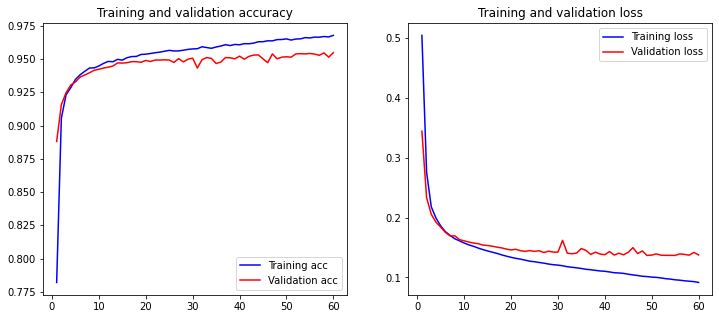

In [ ]:
for label in classes[:1]:
  print("Loading train data", label)
  x,y = process_training_data('resume', label, L, from_cache=True)
  print('Data loaded...')
 
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1000)
 
  model = Sequential()
  model.add(layers.Conv1D(100,1, input_shape=(L,d), activation='relu'))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.1, nesterov=True)
  model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
  
  print(model.summary())
 
  history = model.fit(x_train, y_train, epochs=60, batch_size=64, validation_data=(x_test, y_test))
 
  plot_history(history)
 
  save_model(MY_DIR, label, model)
 
  del x_train
  del x_test
  del y_train
  del y_test
  del x
  del y

In [ ]:
y_pred = model.predict(x)

In [ ]:
del x_train
del x_test
del y_train
del y_test
del x
del y

In [ ]:
def debug_metrics():
  loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
  print("************************Results for class :"+str(curr_class)+"*********************")
  print("Training Accuracy: {:.4f}".format(accuracy))
  loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
  print("Testing Accuracy:  {:.4f}".format(accuracy))
  loss, accuracy = model.evaluate(X_test_ones, Y_test_ones, verbose=False)
  print("Testing Accuracy of class-1:  {:.4f}".format(accuracy))
  loss, accuracy = model.evaluate(X_test_zeros, Y_test_zeros, verbose=False)
  print("Testing Accuracy of class-0:  {:.4f}".format(accuracy))

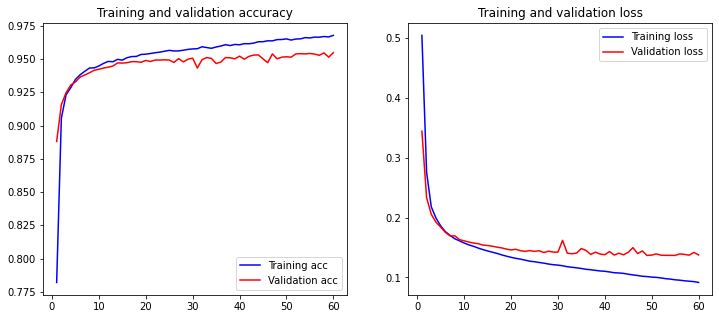

Software_Developer


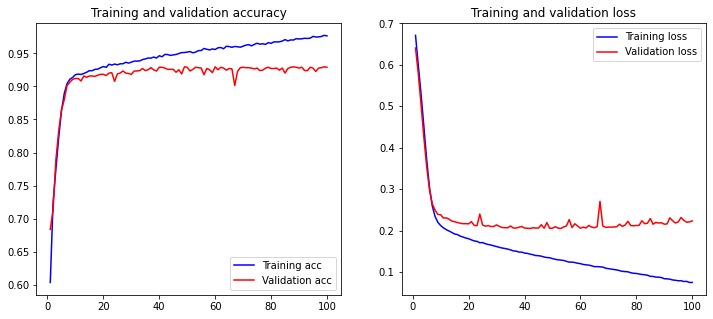

Front_End_Developer


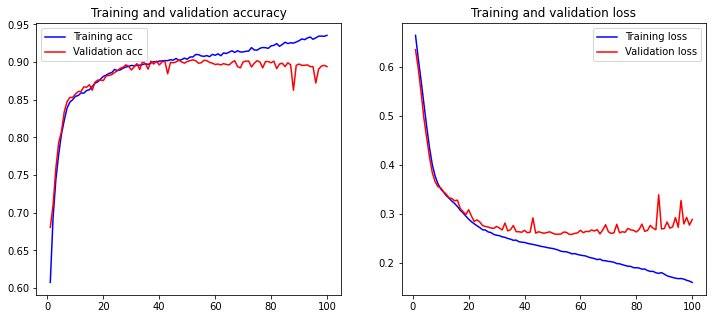

Network_Administrator


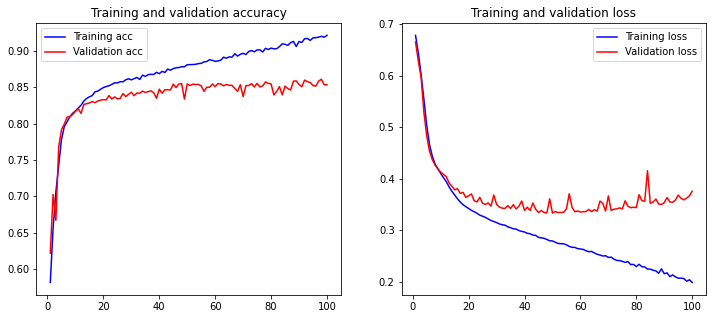

Web_Developer


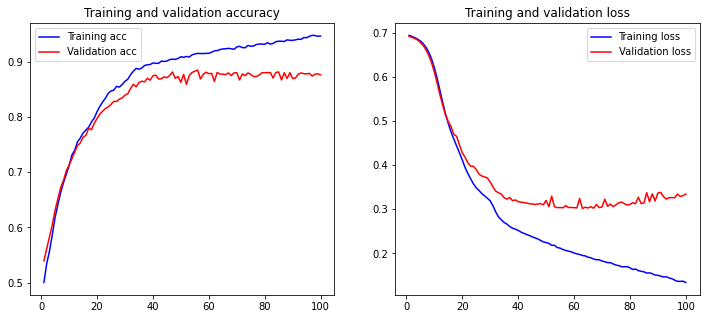

Project_manager


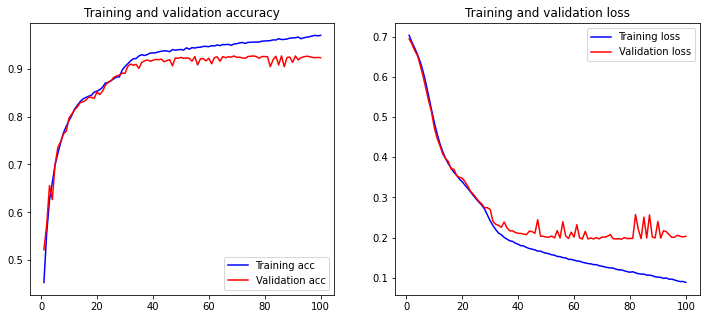

Database_Administrator


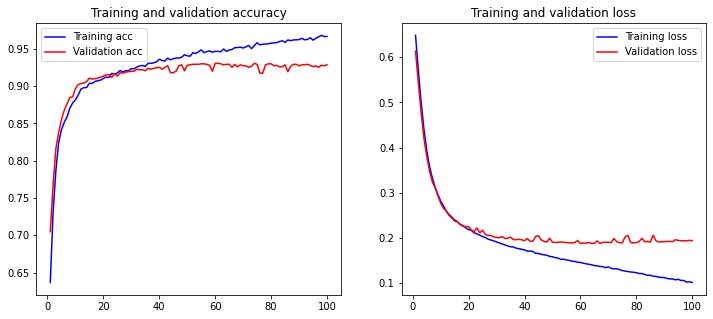

Security_Analyst


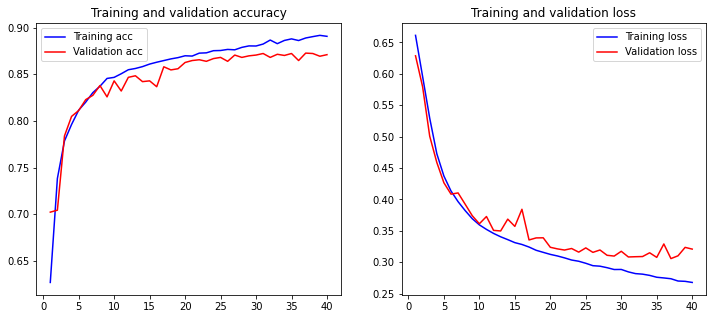

Systems_Administrator


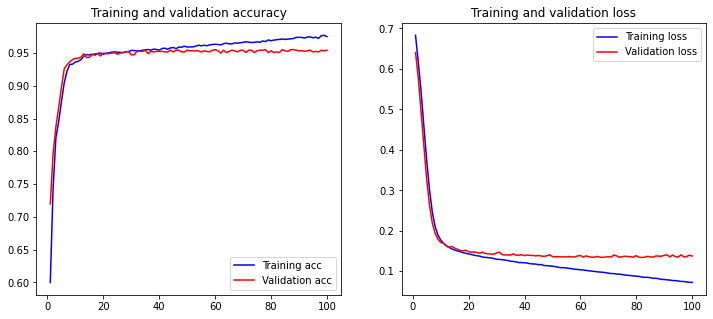

Python_Developer


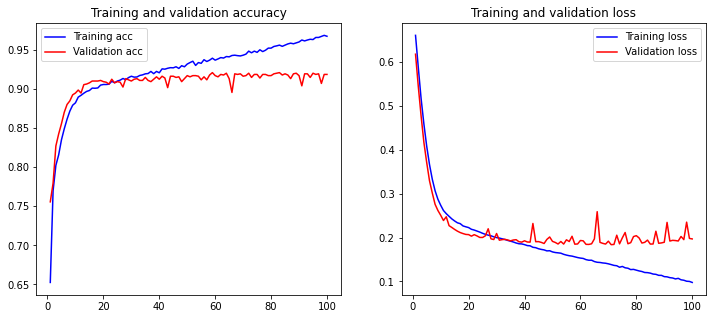

Java_Developer


In [ ]:
for label in classes:
  hist = load_history(MY_DIR, label)
  plot_history(hist)
  print(label)

# Testing and Evaluation

In [ ]:
labels = {"Software_Developer": 0, "Front_End_Developer": 1, "Network_Administrator": 2,
           "Web_Developer": 3, "Project_manager": 4, "Database_Administrator": 5, "Security_Analyst": 6,
           "Systems_Administrator": 7, "Python_Developer": 8, "Java_Developer": 9}

**Dividing data for testing in 3 parts as all data can't be loaded in RAM at a time**

In [ ]:
# process x and y in parts for evaluation 
def process_testing_data(path, dest, count=7500, L=1000, size=100, rc=29783):
  """
    path : directory path where to read file
    dest : directory of destination path to save file
    count : number of data each file
  """
  i,j = 1,1+count
  part = 1
  while i<rc:
    j = min(j, rc+1)

    X = []
    y = []
    print('Processing part :', part)
    for k in tqdm(range(i,j)):
      # read x
      with open('{}/{:05d}.txt'.format(path, k), encoding='ISO-8859-1') as f:
        line = f.readline()
        line = domain_word_selection(line)
        x = []
        length = L
        for word in line:
          if length > 0:
            if word in wv:
              x.append(np.array(wv[word], dtype=np.float32))
              length -= 1
          else:
            break
  
        while length > 0:
          x.append(np.zeros(size, dtype=np.float32))
          length -= 1
        x = np.array(x)
        X.append(x)
      
      temp = [0 for i in range(10)]
      with open('{}/{:05d}.lab'.format(path, k)) as f:
        for line in f:
          index = labels[line.rstrip()] # this is where newline makes difference
          temp[index] = 1

      temp = np.array(temp)
      y.append(temp)

    # write X and y
    print("Saving part", part)
    save_testing_data(dest, part, X, y)
    
    # free ram by deleting
    del X
    del y



    i = j
    j = i+ count
    part += 1

process_testing_data('resume', MY_DIR, count=10000, L=500)

In [ ]:
# load testing data
def load_testing_data(path, part_no=1):
  x_path = "{}/testing/data_x_{}.npy".format(path, part_no)
  y_path = '{}/testing/data_y_{}.npy'.format(path, part_no)

  x = np.load(x_path, allow_pickle=True)
  y = np.load(y_path, allow_pickle=True)

  return x,y
  
# save testing data
def save_testing_data(path, part_no, x, y):
  x_path = "{}/testing/data_x_{}.npy".format(path, part_no)
  y_path = '{}/testing/data_y_{}.npy'.format(path, part_no)

  np.save(x_path, x)
  np.save(y_path, y)

  print("Part", part_no, "saved")
  

In [ ]:
def predict(x, models):
  """
  x : array of features
  models : keras CNN models for all classes
  """
  y = []

  for label, model in models.items():
    if model == None:
      y.append(np.zeros(x.shape[0]))
    else:
      y_pred = model.predict(x)
      y_pred = y_pred.reshape(y_pred.shape[0])
      y_pred = (y_pred > 0.5).astype('int8')
      y.append(y_pred)

  y = np.array(y, dtype='int8')

  return y.T



In [ ]:
models = {}
for label in classes:
  try:
    models[label] = load_model(MY_DIR, label)
    # models[label] = model
  except:
    models[label] = None

models.keys()

dict_keys(['Software_Developer', 'Front_End_Developer', 'Network_Administrator', 'Web_Developer', 'Project_manager', 'Database_Administrator', 'Security_Analyst', 'Systems_Administrator', 'Python_Developer', 'Java_Developer'])

In [ ]:
def accuracy(y, y_pred):
  # take union and intersection
  union = np.count_nonzero(y + y_pred, axis=1)
  inter = np.count_nonzero(y * y_pred, axis=1)

  sum = 0
  for u, i in zip(union, inter):
    if u != 0:
      sum += i/u
    else:
      sum += 1

  return sum/y.shape[0]


def precision(y, y_pred):
  # take intersection for numerator and use y_pred for denominatior
  inter = np.count_nonzero(y * y_pred, axis=1)
  pred = np.count_nonzero(y_pred, axis=1)

  sum = 0
  for num, den in zip(inter, pred):
    if den != 0:
      sum += num/den
    else:
      sum += 1

  return sum/y.shape[0]

def recall(y, y_pred):
  # take intersection for numerator and use y for denominatior
  inter = np.count_nonzero(y * y_pred, axis=1)
  y = np.count_nonzero(y, axis=1)

  sum = 0
  for num, den in zip(inter, y):
    if den != 0:
      sum += num/den
    else:
      sum += 1

  return sum/y.shape[0]

In [ ]:
import gc
parts = [1,2,3]

y = None
y_pred = None

for part_no in parts:
  print('Processing part', part_no, '...')
  x, y_part = load_testing_data(MY_DIR, part_no)
  print('Data Loaded...')

  y_pred_part = predict(x, models)

  if y is None:
    y = y_part
    y_pred = y_pred_part
  else:
    y = np.concatenate((y, y_part), axis=0)
    y_pred = np.concatenate((y_pred, y_pred_part), axis=0)

  del x
  del y_part

  gc.collect()

print(y.shape, y_pred.shape)

Processing part 1 ...
Data Loaded...
Processing part 2 ...
Data Loaded...
Processing part 3 ...
Data Loaded...
(29783, 10) (29783, 10)


In [ ]:

prec = precision(y, y_pred)
rec = recall(y, y_pred)


print('Precision :{:.2f}'.format(prec))
print('Recall :{:.2f}'.format(rec))

Precision :0.84
Recall :0.92


In [ ]:
print(y.shape, y_pred.shape)

(29783, 10) (29783, 10)


##Rough  Work 

In [ ]:
for i in range(10,30):
  print('union',union[i])
  print('inter',inter[i])
  print('')

In [ ]:
acc = accuracy(y, y_pred)
prec = precision(y, y_pred)
rec = recall(y, y_pred)

print('Accuracy : {:.2f}'.format(acc))
print('Precision :{:.2f}'.format(pre))
print('Recall :{:.2f}'.format(rec))

Accuracy : 0.69
Precision :0.73
Recall :0.91


In [ ]:
acc = accuracy(y, y_pred)
prec = precision(y, y_pred)
rec = recall(y, y_pred)

Accuracy : 0.69
Precision :0.74
Recall :0.92


In [ ]:
print('Accuracy : {:.2f}'.format(acc))
print('Precision :{:.2f}'.format(prec))
print('Recall :{:.2f}'.format(rec))

In [ ]:
%reset -f

In [ ]:
import gc
pre=8.4
gc.collect()

0